In [ ]:
import csv
import random
import numpy as np
from scipy import stats

In [ ]:
# This function is used for data input operation for csv file. 
# Parmeters: 
## Filepath - Path of the csv file on the system
## COLS - Number of columns present in the csv. Default is 5.
# Returns:
## List - This List Contains a list of all the input variables values, list of output values, list of mean for all input 
## variables and list of standard deviation for all input variables.

def get_data(filepath,COLS = 5):
    # Opens the file handler for the dataset file. Using variable 'f' we can access and manipulate our file anywhere 
    # in our code after the next code line.
    f = open(filepath,"r")

    # This list will contain the header names (column names) for each column. If there are no header names for the dataset
    # you can mark set header flag as False.
    headers = []
    header= False
    
    # Predictors Collection (or your input variable)
    X = [[] for i in range(COLS-1)]

    # Output Response (or your output variable)
    Y = []

    # Initializing a reader generator using reader method from csv module. A reader generator takes each line from the 
    # file and converts it into list of columns.
    reader = csv.reader(f)

    # Using for loop, we are able to read one row at a time.
    for row in reader:
        # if there is a header row in the dataset (i.e if the dataset contains column names as well we append them into headers list)
        if header:
            for i in range(0,COLS):
                headers.append(row[i])
            header = False
        else:
            # This section of the code extracts input variables values.
            for i in range(0,COLS-1):
                X[i].append(float(row[i]))
        
        # This line of code helps in getting 
        Y.append(row[COLS-1])

    # Close the file once we have succesffuly stored all data into our X and Y variables.
    f.close()
    
    # Set this as True if you want to normalize the data, set False otherwise.
    data_normalization = True
    
    if data_normalization:
        # Normalization of Input Data.
        mean = []
        std = []
        
        # Calculation of mean and standard deviation for all input variables.
        for i in range(0,COLS-1):
            X[i] = np.array(X[i])
            mean.append(np.mean(X[i]))
            std.append(np.std(X[i]))
    
        # Returning Normalized Data
        return [np.array([(X[i] - mean[i])/(std[i]) for i in range(0,4)]),np.array(Y),mean,std]
    else:
        return [np.array(X),np.array(Y)]

In [ ]:
# Euclidean Distance - This is a similarity measure which depicts the distance between two points in N Dimensions.
# Let's suppose you have two data points in 2 Dimensional plane A and B. Euclidean distance is the shortest distance 
# between A and B. 
# Illustrated in Fig-1
def euclidean_distance(a,b):
    distance = 0.0
    for i in range(0,len(a)):
        distance = distance + ((a[i]-b[i])**2)
    return np.sqrt(distance)

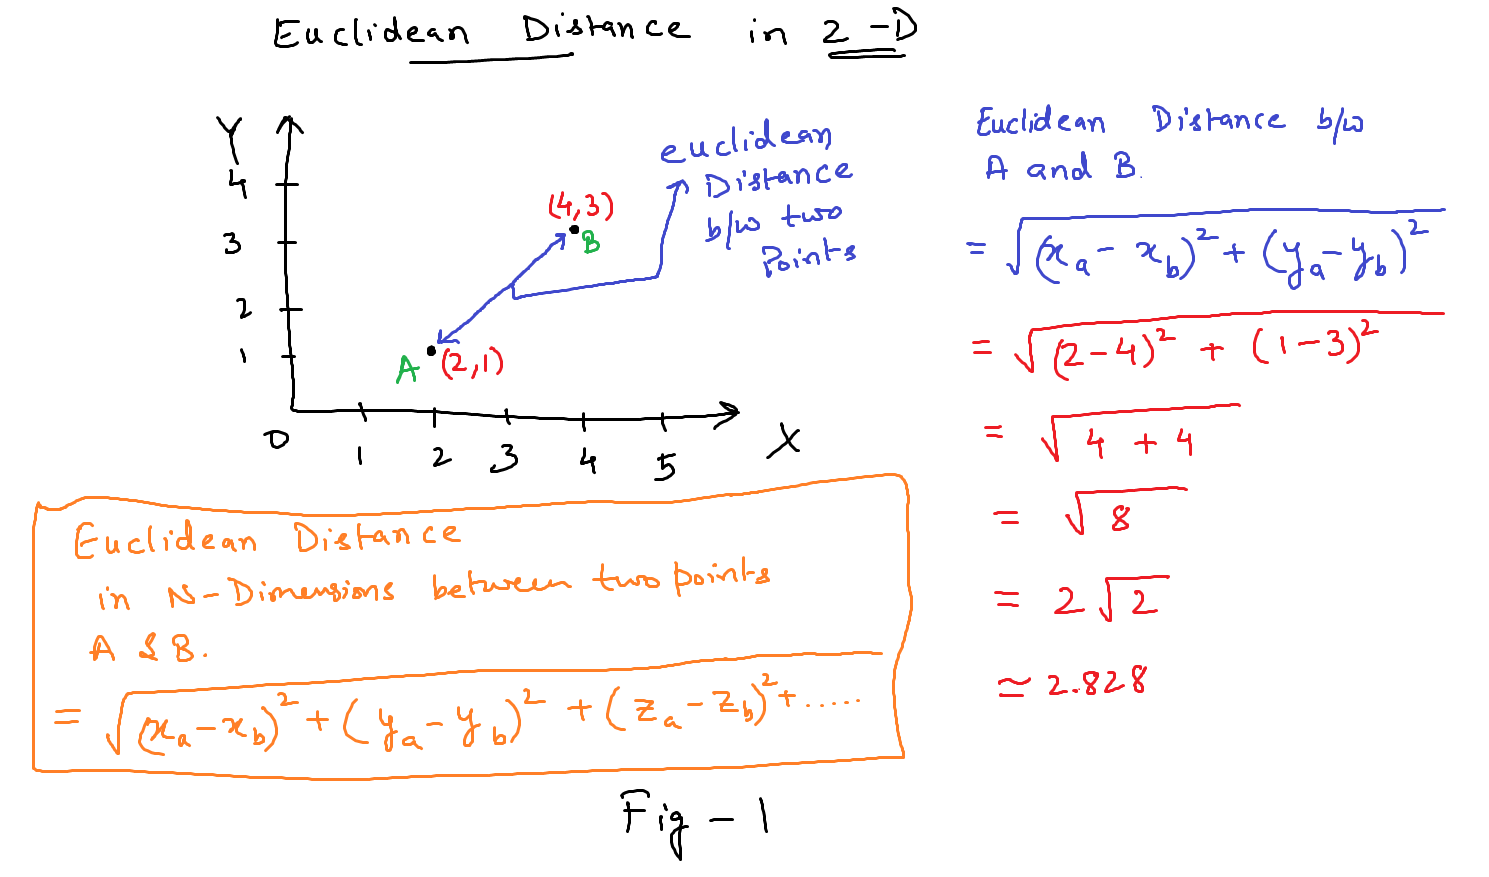

In [ ]:
# Prediction Method using K-Nearest neighbour Technique
def predict_using_KNN(TrainingData,NewData, k):
    euclidean_distances_with_category = []
    # Input Variables of Training Data 
    train_X = TrainingData[0]
    
    # Output Variable of Training Data
    train_Y = TrainingData[1]
    
    # Calculating Euclidean Distance between unknown datapoint and all the datapoints in training data. 
    # For illustration see fig-2
    # It is stored in a list of the following format:
    # [
    #   [2.35,"Iris-Setosa"], # Distance of Training Data Point-1 from Unknown Datapoint
    #   [3.51,"Iris-Virginica"],# Distance of Training Data Point-2 from Unknown Datapoint
    #   ......
    # ]
    for idx in range(0,train_X.shape[0]):
        euclidean_distances_with_category.append([euclidean_distance(list(train_X[idx]),NewData),train_Y[idx]])
        
    # Sort euclidean Distance between all the data points in training data and unknown datapoint in increasing order
    euclidean_distances_with_category.sort()
    
    # Return top k euclidean distance from the sorted collection. These are the k datapoints which are nearest to our 
    # unknown datapoint and depending their classes we will assign a class to unknown datapoint.
    return euclidean_distances_with_category[:k]

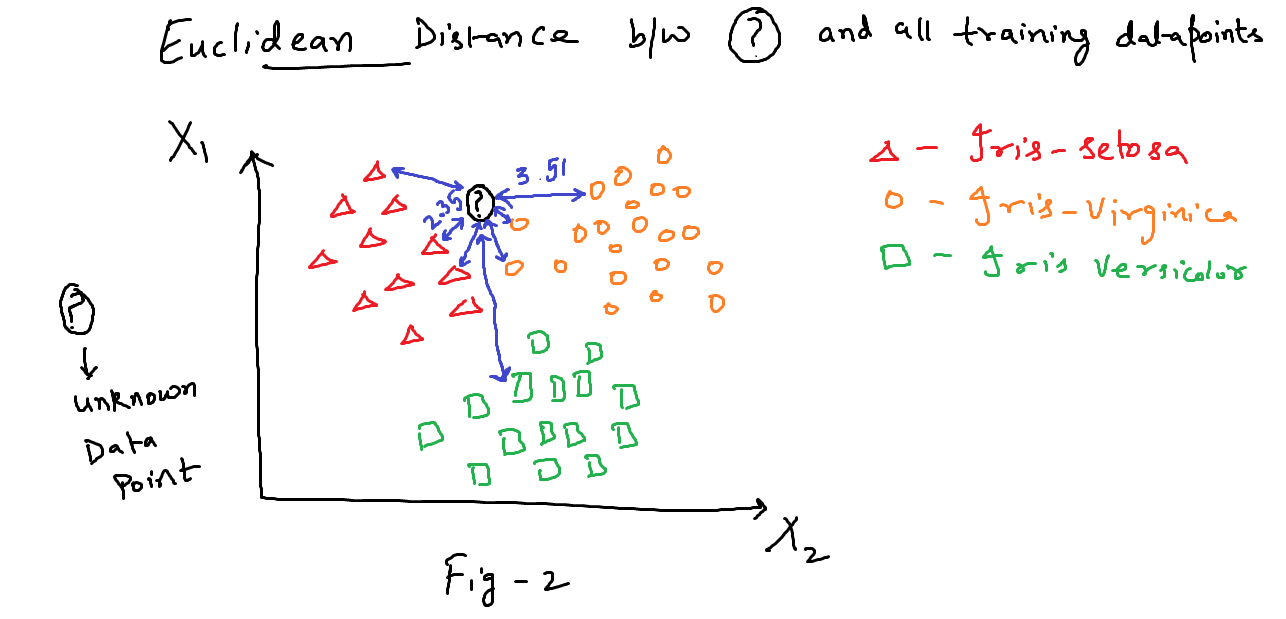

In [ ]:
def random_order(X,Y):
    # Create a ordered sequence upto length of rows present in dataset [1,2,3,4,5,........,N]
    # where N - number of rows in dataset
    randomize = np.arange(X.shape[0])
    # Randomize (shuffle) the above list 
    np.random.shuffle(randomize)
    
    # Shuffle the X and Y collection accordingly.
    X = X[randomize]
    Y = Y[randomize]
    
    return [X,Y]

In [ ]:
# Get Input Variables (X), Output Variable (Y), means of all input variables, standard deviations of all input variables.
X,Y,mean,std = get_data("iris.csv",5)

# Currently we have X in which the format is [[All values of input variable 1],[All Values of input variable 2],....]
# BUT what we want the format of out X variable is - 
# [
#  [All values of input variables for training data point 1],
#  [All values of input variables for training data point 2],
#  [All values of input variables for training data point 3],
#  [All values of input variables for training data point 4],
#  .....
# ]
# Thus we transpose our X array
X = np.transpose(X)

# In our iris dataset all the rows of iris-setosa are first 50 rows, then next 50 rows are for iris virginica and so on.
# This makes it difficult for us to select one part of the dataset for training and other for testing.
# To eliminate this we shuffle our original dataset randomly using random_order function we created.
X,Y = random_order(X,Y)

# This is the row at which we split our dataset as training and testing.
# Ratio is the value of how much data you want to use as training dataset
ratio = 0.8
split_row = int(X.shape[0]*ratio)

# Creating training dataset
train_X = X[0:split_row]
train_Y = Y[0:split_row]

# Creating testing dataset
test_X = X[split_row:]
test_Y = Y[split_row:]

In [ ]:
# Nearest Neighbour "K" Hyper Parameter
k=10

# Predictions for test dataset will be stored in pred_Y
pred_Y = []

# For all the rows present in testing dataset, using k nearest neighbor predict the class to which they belong.
for idx in range(0,test_X.shape[0]):
    tmp = []
    
    # Get top k euclidean distances (nearest training data points to current data point in testing dataset)
    topKValues = predict_using_KNN([train_X,train_Y],test_X[idx],k)
    
    # Out of those k nearest data points, which class is most occuring in those data points and assign that class
    # to the current testing data point.
    for _k in range(0,k):
        tmp.append(topKValues[_k][1])
    pred_Y.append(stats.mode(tmp)[0][0])

pred_Y = np.array(pred_Y)
print(pred_Y)